In [1]:
#X-FP analysis of FP2 model on external dataset

#x-fp v 1.1.0 (12 Oct 2023)

In [2]:
from xfp.xfp_tree_explainer import XFPTreeExplainer

In [3]:
import pandas as pd
import numpy as np
import shap
from xgboost import XGBClassifier

In [4]:
#reading external data 

In [ ]:
df = pd.read_parquet('/path/to/external_set.parquet')
df.info()
df.head()
# replace "/path/to/" with proper path

In [6]:
#reading the fp2 model
model_fp2 = XGBClassifier()
fp2_model_path = "/path/to/Morgan_FP_radius2_model.json"
# replace "/path/to/" with proper path

model_fp2.load_model(fp2_model_path)
model_fp2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=16,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [7]:
shap_explainer = shap.TreeExplainer(model_fp2)
shap_explainer

In [8]:
xfp = XFPTreeExplainer(shap_explainer)

In [9]:
xfp.fetch_fp_from_df(df, smiles_col = "Smiles", n_bits= 4096, radius = 2, use_chirality = True)

In [ ]:
#just to see
xfp.input_df.head()

In [ ]:
#just to see
xfp.input_df.info()

In [12]:
xfp.generate_frags(n_jobs = 4, verbose = True)

Generating fragments. This step may take a while.
1635 / 4096 bits are set in the dataset.
Parallelize using 4 cores.


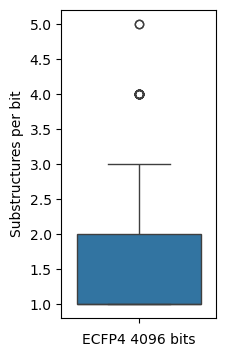

In [13]:
xfp.make_substruct_per_bit_plot()

In [14]:
xfp.fp

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
xfp.fp.shape

(127, 4096)

In [16]:
xfp.generate_shap_values()

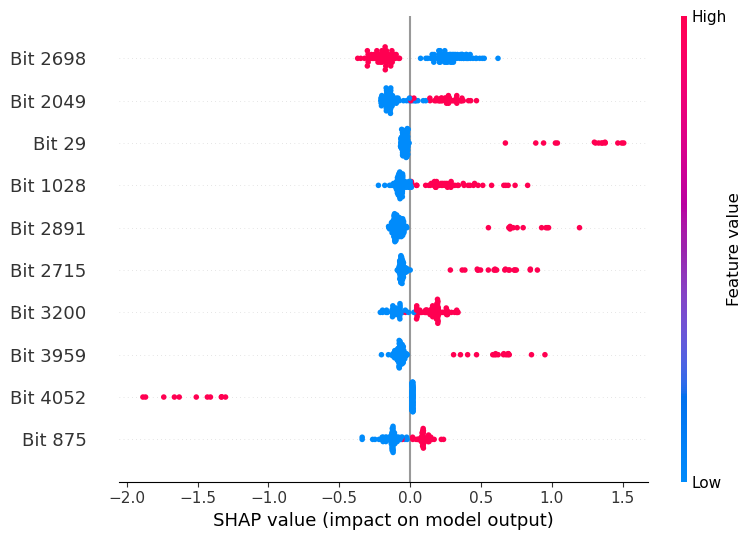

In [17]:
xfp.generate_shap_summary_plot()

In [19]:
xfp.generate_bit_analysis_report([2698, 2049, 29, 1028, 2891, 2715, 3200, 3959, 4052, 875], report_title = "Purchase Data: X-FP Report")

Enter the folder name (with path) to store the images and the report. The default is 'XFP_Tree_Explainer_(today's date)'  enamine_1_12Oct2023


DataFrame.applymap has been deprecated. Use DataFrame.map instead.
DataFrame.applymap has been deprecated. Use DataFrame.map instead.
DataFrame.applymap has been deprecated. Use DataFrame.map instead.
DataFrame.applymap has been deprecated. Use DataFrame.map instead.
DataFrame.applymap has been deprecated. Use DataFrame.map instead.
DataFrame.applymap has been deprecated. Use DataFrame.map instead.
DataFrame.applymap has been deprecated. Use DataFrame.map instead.
DataFrame.applymap has been deprecated. Use DataFrame.map instead.
DataFrame.applymap has been deprecated. Use DataFrame.map instead.
DataFrame.applymap has been deprecated. Use DataFrame.map instead.
